# Forest Cover and CO₂ Emissions Analysis in India

## Exploratory Data Analysis Using Python

## Introduction

This project analyzes long-term trends in forest area percentage and CO₂ emissions in India using World Bank datasets. 

The objective is to:
- Examine environmental sustainability indicators
- Compare long-term trends
- Analyze correlation between forest cover and emissions
- Interpret statistical results responsibly

🔹 SECTION 1 — Import Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

In [6]:
import pandas as pd

forest = pd.read_csv("data/API_AG.LND.FRST.ZS_DS2_en_csv_v2_51.csv", skiprows=4)
forest.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,Unnamed: 70
0,Aruba,ABW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,30.824316,30.611512,30.391626,30.174252,29.955194,29.737205,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,NaN,NaN,NaN
3,Africa Western and Central,AFW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.071327,19.986100,19.901230,19.816784,19.732037,19.647488,NaN,NaN,NaN,NaN
4,Angola,AGO,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,54.762629,54.317406,53.872175,53.426951,52.981722,52.536497,52.091270,NaN,NaN,NaN


In [7]:
forest_india = forest[forest["Country Name"] == "India"]
forest_india.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2017,2018,2019,2020,2021,2022,2023,2024,2025,Unnamed: 70
109,India,IND,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,24.001493,24.09096,24.180762,24.270228,24.359694,24.449497,24.53903,NaN,NaN,NaN


In [8]:
forest_years = forest_india.iloc[:, 4:].T
forest_years.columns = ["Forest Area (%)"]
forest_years.index.name = "Year"

forest_years.head()

,Forest Area (%)
Year,
1960,NaN
1961,NaN
1962,NaN
1963,NaN
1964,NaN


🔹 SECTION 2 — Load Forest Dataset

In [12]:
forest_years = forest_india.iloc[:, 4:].T
forest_years.columns = ["Forest Area (%)"]
forest_years.index.name = "Year"

# Keep only rows where index is numeric (actual years)
forest_years = forest_years[forest_years.index.str.isnumeric()]

forest_years.index = forest_years.index.astype(int)
forest_years["Forest Area (%)"] = pd.to_numeric(forest_years["Forest Area (%)"], errors="coerce")

forest_years = forest_years.dropna()

forest_years.head()

,Forest Area (%)
Year,
1990,21.504848
1991,21.627713
1992,21.750578
1993,21.873442
1994,21.996307


🔹 SECTION 3 — Forest Trend Plot

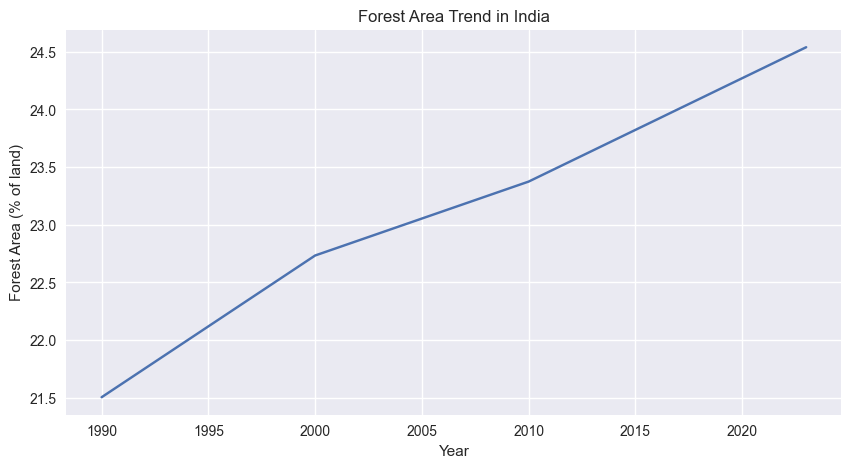

In [13]:
plt.figure(figsize=(10,5))
plt.plot(forest_years.index, forest_years["Forest Area (%)"])
plt.title("Forest Area Trend in India")
plt.xlabel("Year")
plt.ylabel("Forest Area (% of land)")
plt.show()

🔹 SECTION 4 — Load CO₂ Dataset

In [15]:
co2 = pd.read_csv("data/API_EN.GHG.CO2.IC.MT.CE.AR5_DS2_en_csv_v2_5981.csv", skiprows=4)

co2_india = co2[co2["Country Name"] == "India"]

co2_years = co2_india.iloc[:, 4:].T
co2_years.columns = ["CO2 Emissions"]
co2_years.index.name = "Year"

# Keep only numeric years
co2_years = co2_years[co2_years.index.str.isnumeric()]

co2_years.index = co2_years.index.astype(int)
co2_years["CO2 Emissions"] = pd.to_numeric(co2_years["CO2 Emissions"], errors="coerce")

co2_years = co2_years.dropna()

co2_years.head()

,CO2 Emissions
Year,
1970,62.5106
1971,62.5106
1972,65.1634
1973,63.3473
1974,69.0592


🔹 SECTION 5 — CO₂ Trend Plot

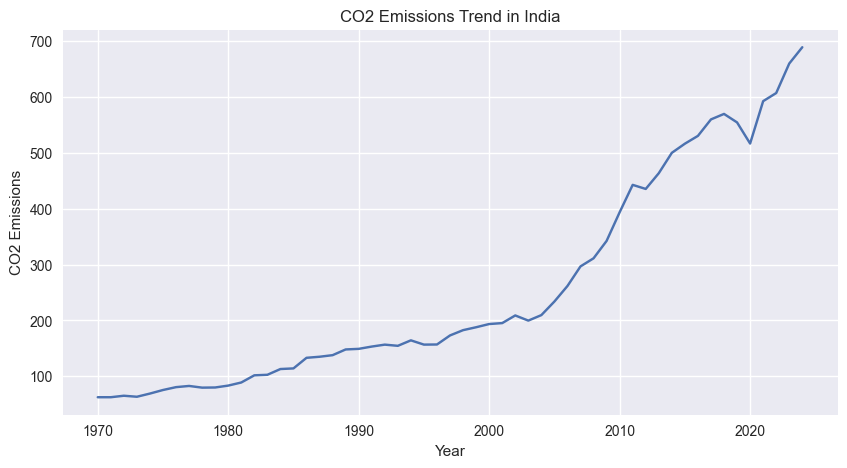

In [16]:
plt.figure(figsize=(10,5))
plt.plot(co2_years.index, co2_years["CO2 Emissions"])
plt.title("CO2 Emissions Trend in India")
plt.xlabel("Year")
plt.ylabel("CO2 Emissions")
plt.show()

🔹SECTION 6 — Merge Datasets

In [17]:
combined = forest_years.join(co2_years, how="inner")
combined.head()

,Forest Area (%),CO2 Emissions
Year,,
1990,21.504848,149.1103
1991,21.627713,153.2047
1992,21.750578,156.6540
1993,21.873442,154.5326
1994,21.996307,164.3370


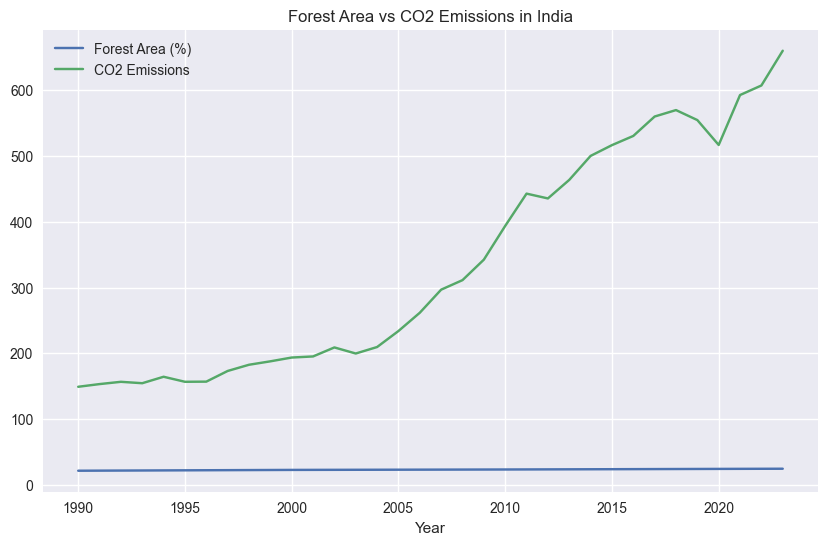

In [18]:
plt.figure(figsize=(10,6))

plt.plot(combined.index, combined["Forest Area (%)"], label="Forest Area (%)")
plt.plot(combined.index, combined["CO2 Emissions"], label="CO2 Emissions")

plt.title("Forest Area vs CO2 Emissions in India")
plt.xlabel("Year")
plt.legend()
plt.show()

🔹 SECTION 7 — Normalized Comparison

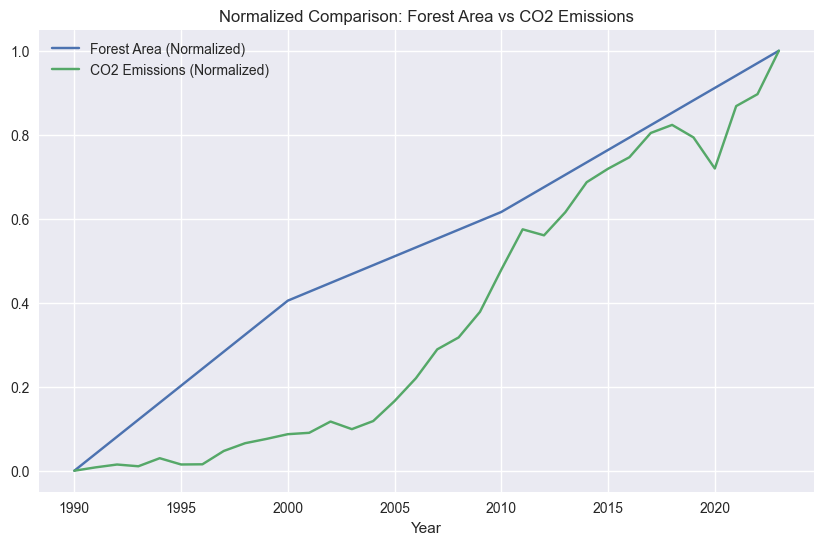

In [21]:
# Normalize both columns
normalized = (combined - combined.min()) / (combined.max() - combined.min())

plt.figure(figsize=(10,6))
plt.plot(normalized.index, normalized["Forest Area (%)"], label="Forest Area (Normalized)")
plt.plot(normalized.index, normalized["CO2 Emissions"], label="CO2 Emissions (Normalized)")

plt.title("Normalized Comparison: Forest Area vs CO2 Emissions")
plt.xlabel("Year")
plt.legend()
plt.show()

🔹 SECTION 8 — Correlation Analysis

In [23]:
correlation = combined["Forest Area (%)"].corr(combined["CO2 Emissions"])
print("Correlation between Forest Area and CO2 Emissions:", correlation)

Correlation between Forest Area and CO2 Emissions: 0.938034445317045


🔹 SECTION 9 — Differenced Correlation (Advanced Step)

### Interpretation of Differenced Correlation

When analyzing year-to-year changes instead of raw values, the correlation drops significantly and becomes slightly negative (-0.29).

This suggests that the strong positive correlation observed earlier is largely driven by long-term time trends rather than direct short-term dependency between forest cover and CO₂ emissions.

This highlights the importance of careful time-series interpretation in environmental data analysis.

In [34]:
combined_diff = combined.diff().dropna()
combined_diff.corr()

,Forest Area (%),CO2 Emissions
Forest Area (%),1.000000,-0.290476
CO2 Emissions,-0.290476,1.000000


🔹 SECTION 10 — Moving Average

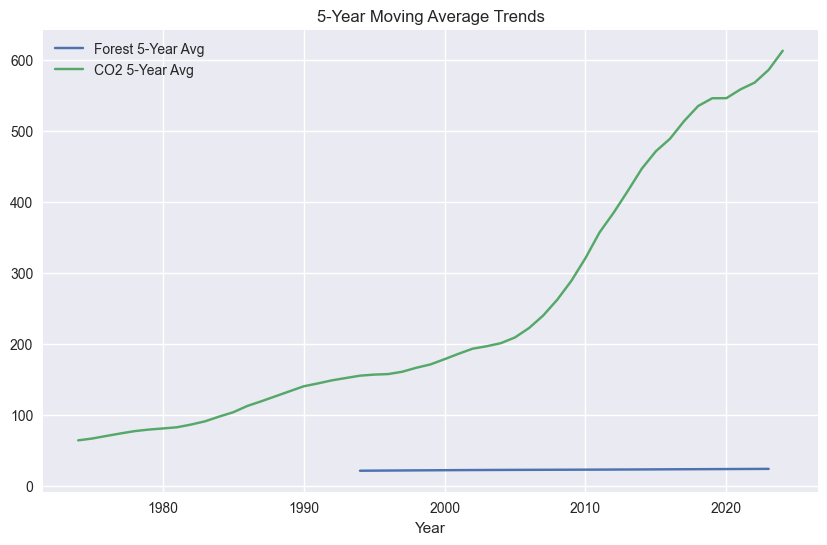

In [32]:
forest_years["Forest MA (5yr)"] = forest_years["Forest Area (%)"].rolling(window=5).mean()
co2_years["CO2 MA (5yr)"] = co2_years["CO2 Emissions"].rolling(window=5).mean()

plt.figure(figsize=(10,6))
plt.plot(forest_years.index, forest_years["Forest MA (5yr)"], label="Forest 5-Year Avg")
plt.plot(co2_years.index, co2_years["CO2 MA (5yr)"], label="CO2 5-Year Avg")
plt.title("5-Year Moving Average Trends")
plt.xlabel("Year")
plt.legend()
plt.show()

🔹 SECTION 11 — Growth Rate

In [36]:
forest_growth = forest_years["Forest Area (%)"].pct_change().mean() * 100
co2_growth = co2_years["CO2 Emissions"].pct_change().mean() * 100

print("Average Annual Forest Growth (%):", round(forest_growth, 4))
print("Average Annual CO2 Growth (%):", round(co2_growth, 4))

Average Annual Forest Growth (%): 0.4008
Average Annual CO2 Growth (%): 4.6857
